## Data preperation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import classification_report
import pprint
from sklearn.metrics import accuracy_score
import scipy.io
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global variables.
attribute_names = []
X = []
y = []
class_names = ['False', 'True']
figure_counter = 1

# Load csv dataset (Brain Tumor.csv).
data = pd.read_csv(r'./data/Brain Tumor.csv', header=0)
dataframe = pd.DataFrame(data)

# Attribute_names label.
attribute_names = list(data.columns)

# All data features with 'Class' removed.
X = dataframe.drop(['Class', 'Image'], axis=1).values

# Classifier for brain tumor (true or false).
y = dataframe['Class'].to_numpy()

dataframe.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
# Information about the dataframe.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [4]:
# Sum of all empty/missing values.
dataframe.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

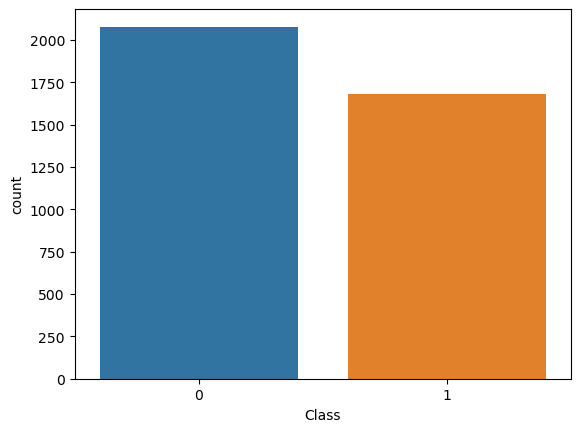

Figure 1: Visualization of classifiction of brain tumors.


In [5]:
# Distribution of the classification of brain tumors.
sns.countplot(dataframe['Class'])
plt.show()
print(f"Figure {figure_counter}: Visualization of classifiction of brain tumors.")
figure_counter+=1

In [6]:
# Split data into training and test samples (67/33).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## Decision tree algorithm

In [7]:
# Create decision tree model.
dtc = DecisionTreeClassifier()

# Define hyperparameters in a dictionary.
parameters = {
    'splitter' : ['best', 'random'],
    'criterion' : ['gini', 'entropy'],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1,5,8,11],
    'random_state' : [0,1,2,3,4,5]
}

# Create a gridsearch object with dtc estimator, 5-fold cross validation, paramaters (defined above) and f1 scoring.
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=parameters, scoring='f1', cv=5, verbose=1, return_train_score=True)

# Fit the data.
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1', verbose=1)

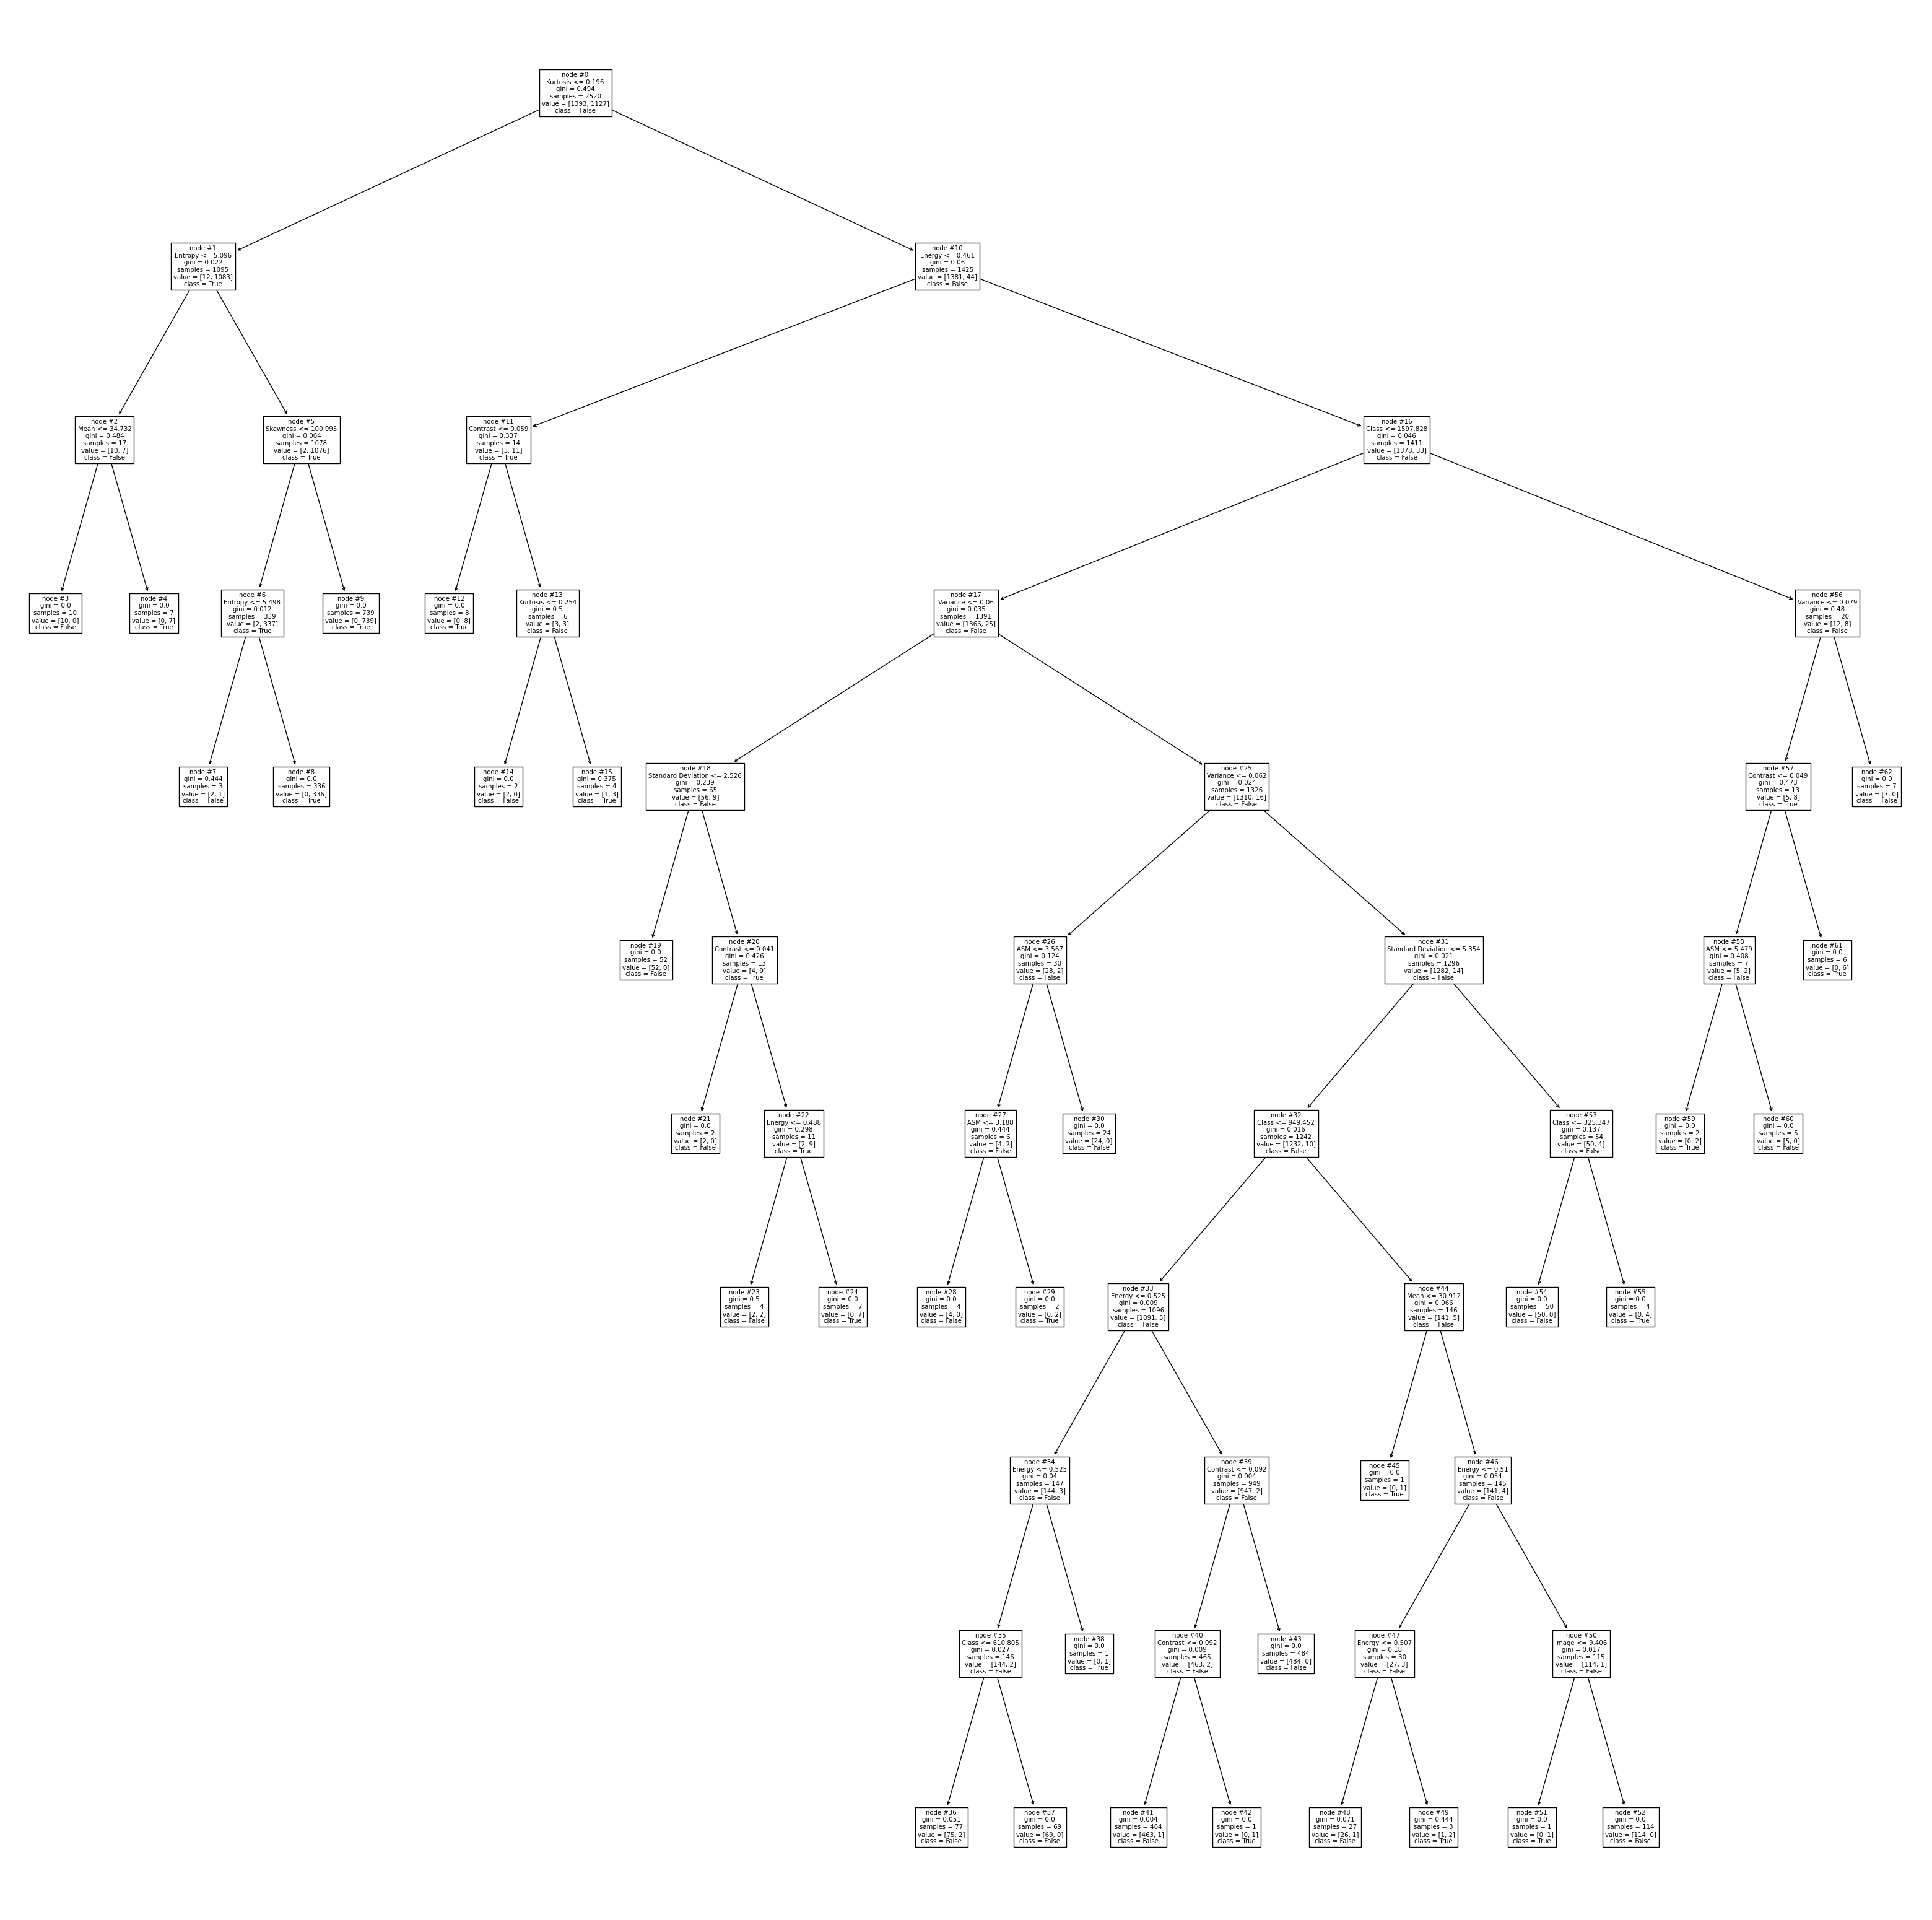

Figure 2: A generated Decision tree from Brain Tumor.csv based on the best estimators.


In [8]:
# Plot decision tree.
plt.figure(figsize=(40,40))
tree.plot_tree(grid_search_dtc.best_estimator_, feature_names = attribute_names, class_names = class_names, node_ids = True)
plt.show()
print(f"Figure {figure_counter}: A generated Decision tree from Brain Tumor.csv based on the best estimators.")
figure_counter+=1

In [9]:
# F1-score of our descicion tree algorithm.
f1_test_score_dtc_1 = grid_search_dtc.score(X_test, y_test) * 100
print("Score for our testing dataset is: {:.2f}%".format(f1_test_score_dtc_1) )
# Best estimators for our descicion tree algorithm.
print(f'Best estimators for the dataset are: {grid_search_dtc.best_params_}')

Score for our testing dataset is: 97.02%
Best estimators for the dataset are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 3, 'splitter': 'best'}


In [10]:
# Check if model is overfitting.
y_train_pred_dtc  = grid_search_dtc.predict(X_train)
y_test_pred_dtc = grid_search_dtc.predict(X_test)

dtc_accuracy_train = accuracy_score(y_train, y_train_pred_dtc) * 100
dtc_accuracy_test = accuracy_score(y_test, y_test_pred_dtc) * 100
print(f'Accuracy score for train data: {dtc_accuracy_train}')
print(f'Accuracy score for test data: {dtc_accuracy_test}')

Accuracy score for train data: 99.64285714285714
Accuracy score for test data: 97.34299516908213


In [11]:
# Take random sample and make a prediction.
num = random.randrange(len(X))
sample = X[[num]]
print(f'Prediction for number {num} with sample content {sample}')
prediction = grid_search_dtc.predict(sample.reshape(1, -1))[0]

print(grid_search_dtc.best_estimator_.decision_path(sample))
print(f"Predicted class: {class_names[prediction]}")
print(f"Actual class: {y[[num]]}")

Prediction for number 1508 with sample content [[1.32373047e+001 7.96308140e+002 2.82189323e+001 8.30475694e-002
  2.57404306e+000 6.99025527e+000 1.48944360e+002 2.53678547e-001
  6.43528051e-002 5.41667279e-001 4.04062801e+000 9.47908528e-001
  7.45834073e-155]]
  (0, 0)	1
  (0, 10)	1
  (0, 16)	1
  (0, 17)	1
  (0, 25)	1
  (0, 31)	1
  (0, 32)	1
  (0, 33)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
Predicted class: False
Actual class: [0]


In [12]:
import pydotplus

test = dataframe.drop(['Class', 'Image'], axis=1)
attribute_names2 = list(test.columns)
num = random.randrange(len(X))
display(data.iloc[num,:].to_frame().T)


# code from https://stackoverflow.com/a/55879031
dot_data = tree.export_graphviz(grid_search_dtc.best_estimator_, out_file=None,
                                feature_names=attribute_names2,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# empty all nodes, i.e.set color to white and number of samples to zero
for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

decision_paths = grid_search_dtc.best_estimator_.decision_path(test.iloc[num,:].to_frame().T)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

filename = 'decision_path_visualization.png'
graph.write_png(filename)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
598,Image599,0,4.39502,132.203289,11.497969,0.104675,3.236204,11.213712,27.47824,0.286688,0.08219,0.589276,2.359318,0.960273,0.0


True

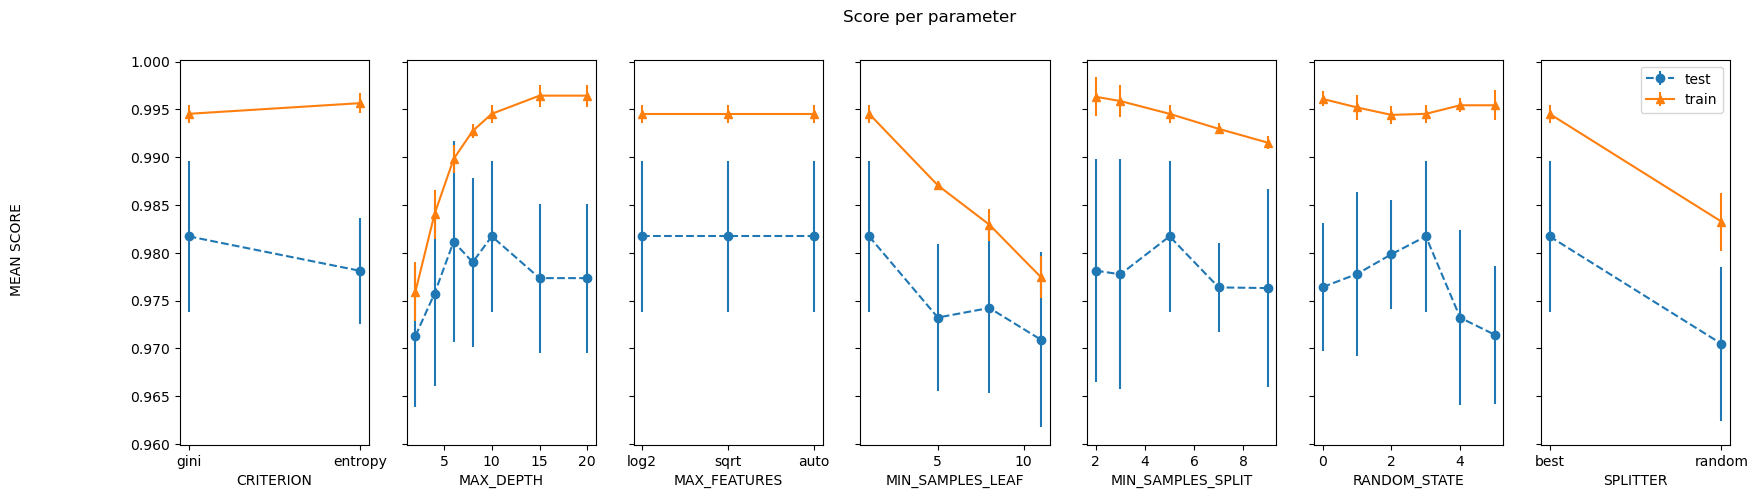

Figure 3: Visualization of test and train data of decision tree.


In [13]:
# Code from https://stackoverflow.com/a/57013458
def plot_search_results(grid):

    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
plot_search_results(grid_search_dtc)
print(f"Figure {figure_counter}: Visualization of test and train data of decision tree.")
figure_counter+=1

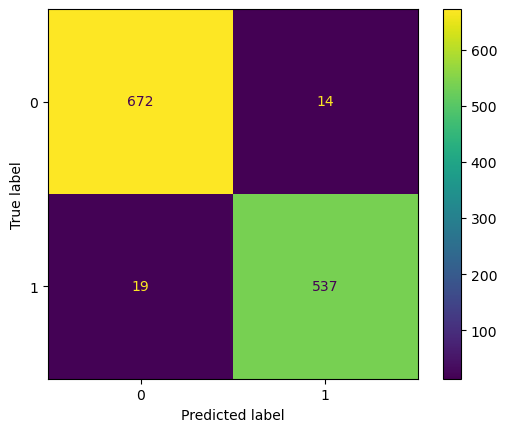

Figure 4: Confusion matrix of the test data from decision tree.


In [14]:
# Plot confusion matrix of test data of decision tree.
plot_confusion_matrix(grid_search_dtc, X_test, y_test)
plt.show()
print(f"Figure {figure_counter}: Confusion matrix of the test data from decision tree.")
figure_counter+=1

In [15]:
# Print classification report for DTC
dtc_report = classification_report(y_true=y_test, y_pred=y_test_pred_dtc, output_dict=True)
f1_test_score_dtc_0 = dtc_report['0']['f1-score'] * 100
pprint.pprint(dtc_report)

{'0': {'f1-score': 0.9760348583877996,
       'precision': 0.9725036179450073,
       'recall': 0.9795918367346939,
       'support': 686},
 '1': {'f1-score': 0.9701897018970189,
       'precision': 0.9745916515426497,
       'recall': 0.9658273381294964,
       'support': 556},
 'accuracy': 0.9734299516908212,
 'macro avg': {'f1-score': 0.9731122801424092,
               'precision': 0.9735476347438285,
               'recall': 0.9727095874320951,
               'support': 1242},
 'weighted avg': {'f1-score': 0.9734181860779171,
                  'precision': 0.973438357623179,
                  'recall': 0.9734299516908212,
                  'support': 1242}}


## K-nearest neighbour algorithm

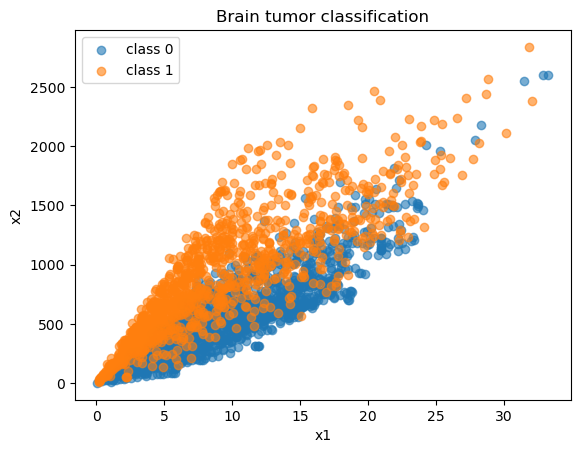

Figure 5: Scatterplot of brain tumor classification.


In [16]:
for classs in np.unique(y):
    plt.scatter(X_train[y_train.flatten() == classs, 0], X_train[y_train.flatten() == classs, 1], label =f'class {classs}', alpha=0.6)
plt.title('Brain tumor classification')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
print(f"Figure {figure_counter}: Scatterplot of brain tumor classification.")
figure_counter+=1

In [17]:
# List Hyperparameters that we want to tune.
leaf_size = [5,10,15,20,25,30,35,40,45,50,55]
n_neighbors = list(range(1, 31))
weights = ['distance', 'uniform', 'None']
p=[1,2]

# Convert to dictionary.
hyperparameters = dict(n_neighbors=n_neighbors , weights=weights, leaf_size=leaf_size, p=p)

knn = KNeighborsClassifier()
  
# Defining parameter range.
grid_search_knn = GridSearchCV(knn, hyperparameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
  
# Fitting the model for grid search
grid_search_knn.fit(X_train, y_train)

print(f'Best parameters for the dataset are: {grid_search_knn.best_params_}')

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
Best parameters for the dataset are: {'leaf_size': 5, 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}


In [18]:
# Calculating f1-score with best performing parmeters.
y_train_pred_knn = grid_search_knn.predict(X_train)
y_test_pred_knn = grid_search_knn.predict(X_test) 
f1_test_score_knn_1 = f1_score(y_test, y_test_pred_knn) * 100

print("F1-score for our testing dataset with tuning is : {:.2f}%".format(f1_test_score_knn_1) )

F1-score for our testing dataset with tuning is : 83.69%


In [19]:
# Check if model is overfitting.
knn_accuracy_train = accuracy_score(y_train, y_train_pred_knn) * 100
knn_accuracy_test = accuracy_score(y_test, y_test_pred_knn) * 100
print(f'Accuracy score for train data: {knn_accuracy_train}')
print(f'Accuracy score for test data: {knn_accuracy_test}')

Accuracy score for train data: 100.0
Accuracy score for test data: 86.07085346215781


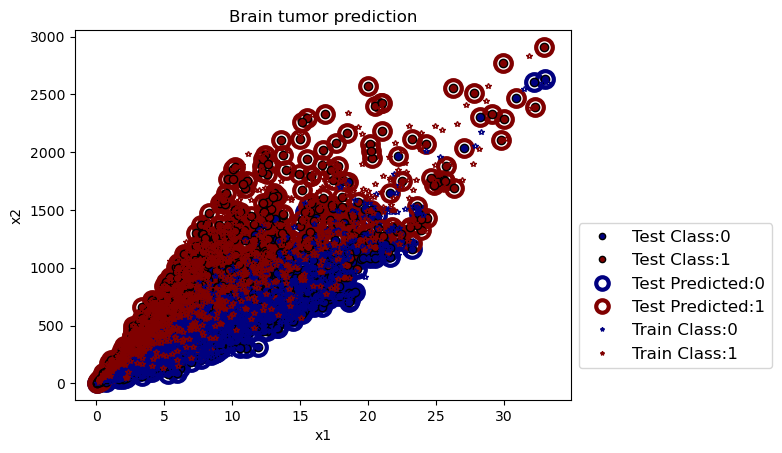

Figure 6: Classification plot of brain tumor prediction.


In [20]:
import warnings
import matplotlib.colors
from toolbox.classification_plot import classification_plot

#X = dataframe.drop(['Class', 'Image', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Contrast', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness', 'Energy', 'ASM'], axis=1).values
#knn = KNeighborsClassifier(n_neighbors=grid_search_knn.bestparams['n_neighbors'], leaf_size=grid_search_knn.bestparams['leaf_size'], p=grid_search_knn.bestparams['p'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#knn.fit(X_train, y_train)
#y_test_pred_knn = knn.predict(X_test) 

classification_plot(X_test, y_test, y_test_pred_knn, X_train = X_train, y_train = y_train)
plt.title('Brain tumor prediction')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
print(f"Figure {figure_counter}: Classification plot of brain tumor prediction.")
figure_counter+=1

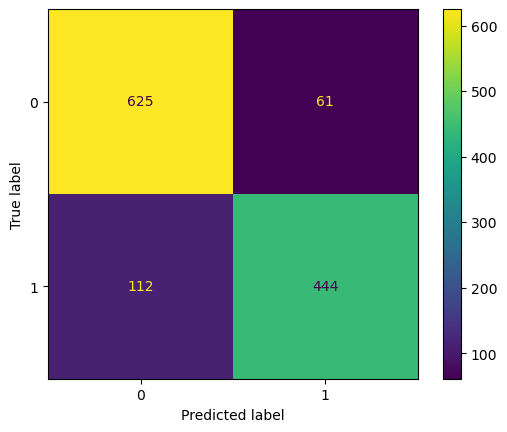

Figure 7: Confusion matrix of the test data from k-nearest neighbour.


In [21]:
# Plot confusion matrix of test data of k-nearest neighbour.
plot_confusion_matrix(grid_search_knn, X_test, y_test)
plt.show()
print(f"Figure {figure_counter}: Confusion matrix of the test data from k-nearest neighbour.")
figure_counter+=1

In [22]:
# Print classification report for KNN
knn_report = classification_report(y_true=y_test, y_pred=y_test_pred_knn, output_dict=True)
f1_test_score_knn_0 = knn_report['0']['f1-score'] * 100
pprint.pprint(knn_report)

{'0': {'f1-score': 0.8784258608573438,
       'precision': 0.8480325644504749,
       'recall': 0.9110787172011662,
       'support': 686},
 '1': {'f1-score': 0.8369462770970783,
       'precision': 0.8792079207920792,
       'recall': 0.7985611510791367,
       'support': 556},
 'accuracy': 0.8607085346215781,
 'macro avg': {'f1-score': 0.857686068977211,
               'precision': 0.8636202426212771,
               'recall': 0.8548199341401514,
               'support': 1242},
 'weighted avg': {'f1-score': 0.8598569006554858,
                  'precision': 0.8619886821042044,
                  'recall': 0.8607085346215781,
                  'support': 1242}}


## K-nearest neighbour algorithm with PCA

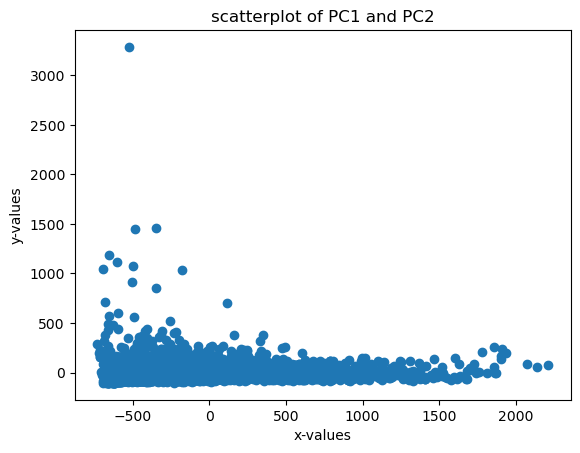

Figure 8: Projection of the first two Principal Components after applying PCA.


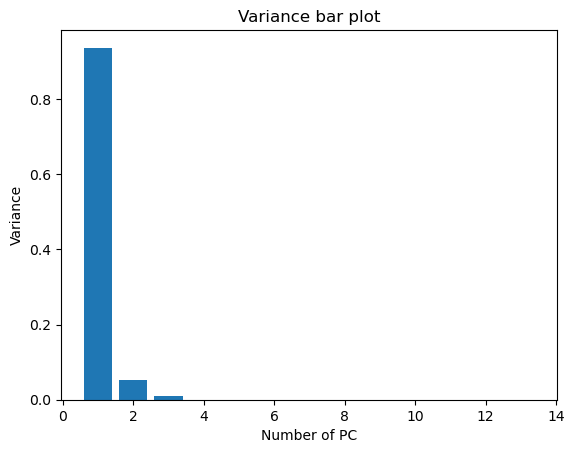

Figure 9: Variance between the eight principle components.
Variance score: 0.9999284855569788


In [23]:
# mean center
mean = np.mean(X_train, axis=0)
Y = X - mean
U, S, V = np.linalg.svd(Y)
Z = np.dot(Y,V.T)

scatter_pc1_pc2 = plt.figure()
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('scatterplot of PC1 and PC2')
plt.show()
print(f"Figure {figure_counter}: Projection of the first two Principal Components after applying PCA.")
figure_counter+=1

rho = S**2/np.sum(S**2)

variance_bar_plot = plt.figure()
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13], rho)
plt.xlabel('Number of PC')
plt.ylabel('Variance')
plt.title('Variance bar plot')
plt.show()
print(f"Figure {figure_counter}: Variance between the eight principle components.")
figure_counter+=1

# variance_first_3_pcs 
total_pcs = sum(rho)
first_three_pcs = rho[0] + rho[1] + rho[2] 
variance_first_3_pcs = first_three_pcs/total_pcs
print(f'Variance score: {variance_first_3_pcs}')

In [24]:
pca = make_pipeline(StandardScaler(), PCA(n_components=3))

pca.fit(X_train, y_train)
grid_search_knn.fit(pca.transform(X_train), y_train)

y_test_pred_pca = grid_search_knn.predict(pca.transform(X_test)) 

accuracy_test_score_knn_pca = accuracy_score(y_test, y_test_pred_pca) * 100
print(f'Accuracy score for test data with PCA applied: {accuracy_test_score_knn_pca}')

f1_test_score_knn_pca_1 = f1_score(y_test, y_test_pred_pca) * 100
print("F1-score for test data with PCA applied: {:.2f}%".format(f1_test_score_knn_pca_1) )

X_embedded = pca.transform(X)

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
Accuracy score for test data with PCA applied: 98.14814814814815
F1-score for test data with PCA applied: 97.90%


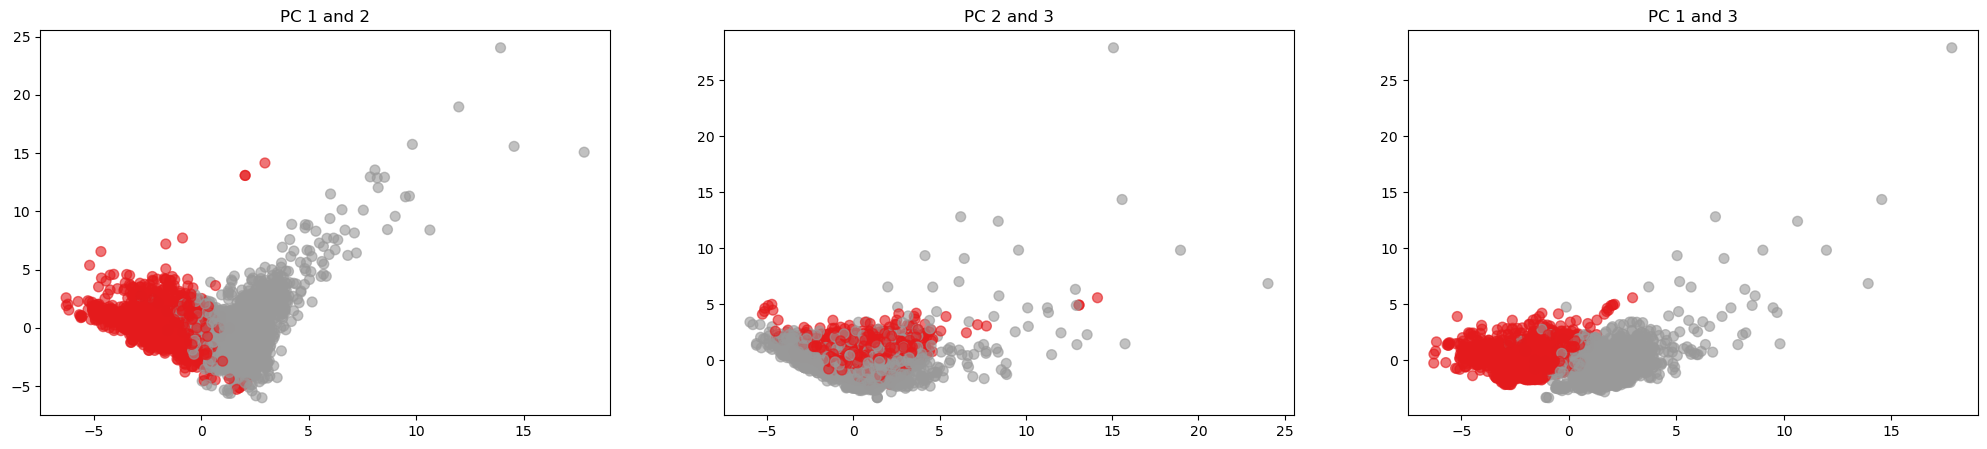

Figure 10: Comparing the top three PC's.


In [25]:
f, axarr = plt.subplots(1, 3) 
f.set_figheight(5)
f.set_figwidth(25)
axarr[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=50, cmap="Set1", alpha=0.6)
axarr[0].set_title("PC 1 and 2")
axarr[1].scatter(X_embedded[:, 1], X_embedded[:, 2], c=y, s=50, cmap="Set1", alpha=0.6)
axarr[1].set_title("PC 2 and 3")
axarr[2].scatter(X_embedded[:, 0], X_embedded[:, 2], c=y, s=50, cmap="Set1", alpha=0.6)
axarr[2].set_title("PC 1 and 3")
plt.show()
print(f"Figure {figure_counter}: Comparing the top three PC's.")
figure_counter+=1

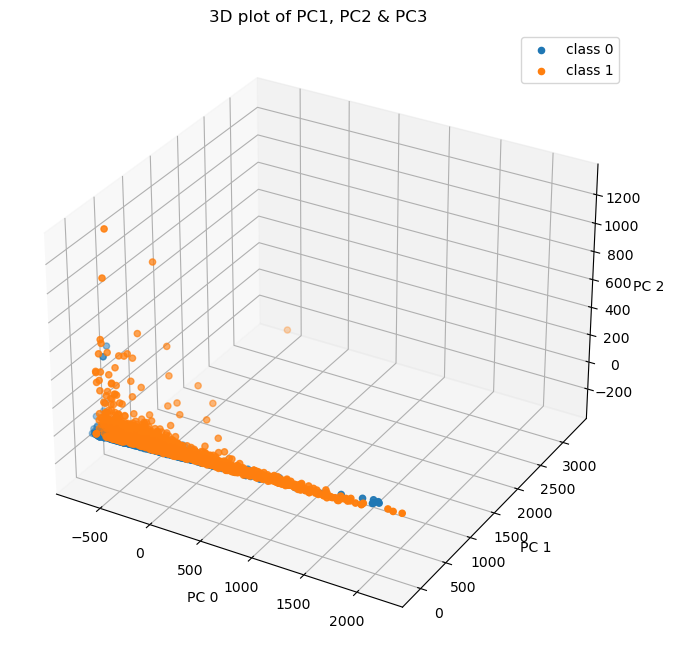

Figure 11: 3D visualization of the comparising between the top three PC's.


In [26]:
# 3d scatterplot
Z0 = Z[y == 0]
Z1 = Z[y == 1]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z0[:, 0], Z0[:, 1], Z0[:, 2], label = 'class 0')
ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], label = 'class 1')
ax.set_title("3D plot of PC1, PC2 & PC3")
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
ax.legend()  
plt.show()
print(f"Figure {figure_counter}: 3D visualization of the comparising between the top three PC's.")
figure_counter+=1

In [27]:
# Print classification report for KNN with pca
knn_report_pca = classification_report(y_true=y_test, y_pred=y_test_pred_pca, output_dict=True)
f1_test_score_knn_pca_0 = knn_report_pca['0']['f1-score'] * 100
pprint.pprint(knn_report)

{'0': {'f1-score': 0.8784258608573438,
       'precision': 0.8480325644504749,
       'recall': 0.9110787172011662,
       'support': 686},
 '1': {'f1-score': 0.8369462770970783,
       'precision': 0.8792079207920792,
       'recall': 0.7985611510791367,
       'support': 556},
 'accuracy': 0.8607085346215781,
 'macro avg': {'f1-score': 0.857686068977211,
               'precision': 0.8636202426212771,
               'recall': 0.8548199341401514,
               'support': 1242},
 'weighted avg': {'f1-score': 0.8598569006554858,
                  'precision': 0.8619886821042044,
                  'recall': 0.8607085346215781,
                  'support': 1242}}


## Model comparison

In [28]:
comparisonData = {"Classification Algorithms": ["Decision Tree Classifier", "KNN Classifier", "KNN Classifier PCA"],
      "F1-score 0 classification": [f1_test_score_dtc_0, f1_test_score_knn_0, f1_test_score_knn_pca_0],
      "F1-score 1 classification": [f1_test_score_dtc_1, f1_test_score_knn_1, f1_test_score_knn_pca_1],
      "Accuracy score": [dtc_accuracy_test, knn_accuracy_test, accuracy_test_score_knn_pca]}
comparison = pd.DataFrame(comparisonData)
comparison

,Classification Algorithms,F1-score 0 classification,F1-score 1 classification,Accuracy score
0,Decision Tree Classifier,97.603486,97.018970,97.342995
1,KNN Classifier,87.842586,83.694628,86.070853
2,KNN Classifier PCA,98.346513,97.895700,98.148148


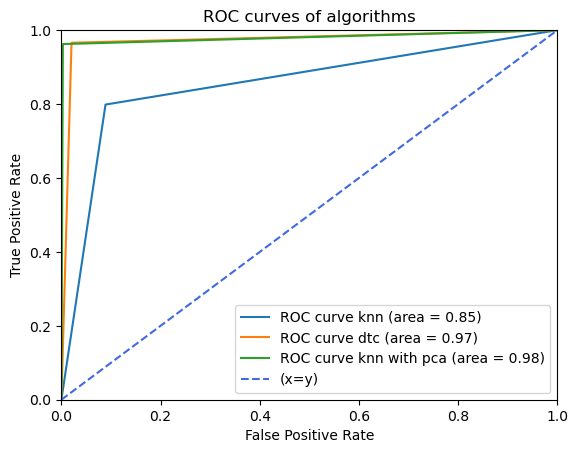

Figure 13: ROC curves of the used algorithms, TPR on the y-axis and FPR on the x-axis.



In [36]:
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]


fpr_dtc, tpr_dtc, thresholds_dtc = metrics.roc_curve(y_test, y_test_pred_dtc)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_test_pred_knn)
fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, y_test_pred_pca)

auc_score_dtc = metrics.roc_auc_score(y_test, y_test_pred_dtc)
auc_score_knn = metrics.roc_auc_score(y_test, y_test_pred_knn)
auc_score_knn_pca = metrics.roc_auc_score(y_test, y_test_pred_pca)

plt.figure()
plt.plot(
    fpr_knn,
    tpr_knn,
    label="ROC curve knn (area = %0.2f)" % auc_score_knn,
)
plt.plot(
    fpr_dtc,
    tpr_dtc,
    label="ROC curve dtc (area = %0.2f)" % auc_score_dtc,
)
plt.plot(
    fpr_pca,
    tpr_pca,
    label="ROC curve knn with pca (area = %0.2f)" % auc_score_knn_pca,
)
plt.plot([0, 1], [0, 1], color="royalblue", linestyle="--", label='(x=y)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC curves of algorithms')
plt.legend(loc="lower right")
plt.show()
print(f"Figure {figure_counter}: ROC curves of the used algorithms, TPR on the y-axis and FPR on the x-axis.\n")
figure_counter+=1